In [3]:
!pip install pdf2image
!pip install pytesseract
!pip install pillow
!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!pip install pytesseract
from pdf2image import convert_from_path
from pytesseract import image_to_string
from PIL import Image
import cv2
import pytesseract
from pdf2image import convert_from_path
from pytesseract import image_to_string
from PIL import Image
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd


zsh:1: command not found: apt-get
zsh:1: command not found: apt-get


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prathyushavajinepally/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/prathyushavajinepally/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prathyushavajinepally/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/prathyushavajinepally/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prathyushavajinepally/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
from pdf2image import convert_from_path
from PIL import Image

def split_pdf_pages(input_file_path):
    # Convert the PDF into a list of PIL Image objects
    images = convert_from_path(input_file_path)

    for i, image in enumerate(images):
        # Save each image as a separate file
        output_file_path = f'page_{i+1}.png'
        image.save(output_file_path, 'PNG')
        print(f'Saved page {i+1} as {output_file_path}')



# Specify the path to your PDF file
pdf_file_path = '/Users/prathyushavajinepally/Desktop/Ptreports.pdf'

# Split the PDF into separate pages
split_pdf_pages(pdf_file_path)

Saved page 1 as page_1.png
Saved page 2 as page_2.png
Saved page 3 as page_3.png
Saved page 4 as page_4.png
Saved page 5 as page_5.png
Saved page 6 as page_6.png
Saved page 7 as page_7.png
Saved page 8 as page_8.png
Saved page 9 as page_9.png
Saved page 10 as page_10.png
Saved page 11 as page_11.png
Saved page 12 as page_12.png
Saved page 13 as page_13.png
Saved page 14 as page_14.png
Saved page 15 as page_15.png
Saved page 16 as page_16.png
Saved page 17 as page_17.png


In [5]:
import pytesseract
from PIL import Image

# Set the path to the Tesseract executable (replace with your own path)
pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'
# Open the image file
image3 = Image.open('/Users/prathyushavajinepally/Downloads/page_3.png')
image4 = Image.open('/Users/prathyushavajinepally/Downloads/page_4.png')

# Perform OCR to extract text from the image
text3 = pytesseract.image_to_string(image3)
text4 = pytesseract.image_to_string(image4)


# Print the extracted text
#print(text3)
#print(text4)
data=text3+text4
print(data)


Non-HDL cholesterol <3.3 mmol/L (<2.5 mmol/L for very high risk)
High risk - Primary prevention Very high risk - Secondary prevention
Target values from the AACB Lipid Reporting Guideline 2018.

Please note that as there is a continuum of risk, benefits are obtained for
any measured lipid components moving towards and beyond the various target
levels.

Lipid reporting was updated on 25/08/2022 with new reference limits for
patients >=10 years old, revised treatment targets and the addition of a
non-HDL cholesterol result.

Tests Completed: LFT(s),Lipids(s),C(s),UCreat(s),E(s),Glu(p),Phos(s),
UA(s),Iron(s),HDL & LIPIDS,CRP(s),Vit D(s),TSH(s),
HbAlc Mon(e),ESR(e)

Tests Pending : Ca(s)

Sample Pending

KONKISA, SUJATHA

303/35 WALDRON RD, SEFTON. 2162

Phone: 99115858

Birthdate: 01/12/1955 Sex: F Medicare Number: 2734521624

Your Reference: 00120677 Lab Reference: 884122152-C-Biochemistry
Laboratory: Douglass Hanly Moir Pathology eOrder

Addressee: DR GEETA TADIMALLA Referred by: DR GEE

In [6]:
import re
import pandas as pd

In [7]:
pattern = r'(.+?)\s+((?:[\d.]+\s+)*[\d.]+)\s+(\S+)\s+(.+)$'
matches = re.findall(pattern, data, re.MULTILINE)

# Extract the data with units, test names, and values along with symbols
result = []
for match in matches:
    test_name = match[0].strip()
    values = match[1].strip().split()
    unit = match[2].strip()
    reference = match[3].strip()

    if len(values) < 3:
        values.extend([None] * (3 - len(values)))  # Add None values if fewer than three values

    # Remove 'H' from the values if it exists
    values = [value.replace('H', '') if value else None for value in values]

    # Append each set of data as a dictionary to the result list
    row_data = {
        'Test': test_name,
        '16/01/21': values[0],
        '18/09/21': values[1],
        '10/10/22': values[2],
        'Units': unit,
        'Reference': reference
    }
    result.append(row_data)

df = pd.DataFrame(result)

# Modify the data for index 25
df.at[25, 'Test'] = "Cholesterol"
df.at[25, '16/01/21'] = "5.3"
df.at[25, '18/09/21'] = "5.7"
df.at[25, '10/10/22'] = "5.6"
df.at[25, 'Units'] = "mmol/L"
df.at[25, 'Reference'] = "<5.5"

# Modify the data for index 11
df.at[11, 'Test'] = "eGFR"
df.at[11, '16/01/21'] = ">90"
df.at[11, '18/09/21'] = "88"
df.at[11, '10/10/22'] = "76"
df.at[11, 'Units'] = "mL/min/1.73m2"
df.at[11, 'Reference'] = "(>59)"
# Slice the data from 4 to 26 index
Slicedf1 = df.iloc[5:27, :]
Slicedf1



,Test,16/01/21,18/09/21,10/10/22,Units,Reference
5,Sodium,141,136,140,mmol/L,(135-145)
6,Potassium,4.5,4.4,4.4,mmol/L,(3.5-5.5)
7,Chloride,105,104,101,mmol/L,(95-110)
8,Bicarbonate,27,24,28,mmol/L,(20-32)
9,Urea,3.0,4.4,5.2,mmol/L,(3.0-8.5)
10,Creatinine,60,65,70,umol/L,(45-85)
11,eGFR,>90,88,76,mL/min/1.73m2,(>59)
12,Urate,0.30,0.30,0.29,mmol/L,(0.15-0.40)
13,Calcium,2.34,2.25,2.51,mmol/L,(2.15-2.55)
14,Corr Calcium,2.40,2.37,2.51,mmol/L,(2.15-2.55)


In [8]:
 #Reset the index from 0 to 22
df1 = Slicedf1.reset_index(drop=True)
df1

,Test,16/01/21,18/09/21,10/10/22,Units,Reference
0,Sodium,141,136,140,mmol/L,(135-145)
1,Potassium,4.5,4.4,4.4,mmol/L,(3.5-5.5)
2,Chloride,105,104,101,mmol/L,(95-110)
3,Bicarbonate,27,24,28,mmol/L,(20-32)
4,Urea,3.0,4.4,5.2,mmol/L,(3.0-8.5)
5,Creatinine,60,65,70,umol/L,(45-85)
6,eGFR,>90,88,76,mL/min/1.73m2,(>59)
7,Urate,0.30,0.30,0.29,mmol/L,(0.15-0.40)
8,Calcium,2.34,2.25,2.51,mmol/L,(2.15-2.55)
9,Corr Calcium,2.40,2.37,2.51,mmol/L,(2.15-2.55)


In [9]:
import pytesseract
from PIL import Image

# Set the path to the Tesseract executable (replace with your own path)
pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'
# Open the image file
image13 = Image.open('/Users/prathyushavajinepally/Downloads/page_13.png')
image14 = Image.open('/Users/prathyushavajinepally/Downloads/page_14.png')

# Perform OCR to extract text from the image
text13 = pytesseract.image_to_string(image13)
text14 = pytesseract.image_to_string(image14)


# Print the extracted text
print(text13)
print(text14)


Reference intervals are included for referenc
treatment goals should be guided by patient-s
assessment (see Australian Cardiovascular Ris
web-site www.cvdcheck.org.au
risk assessment for individual patients.)

e only, and interpretation /
pecific cardiovascular risk
k Charts. Alternatively, the

can be accessed in order to complete a

Haemolysis Nil Nil Nil
Icterus Nil Nil Nil
Lipaemia Nil Nil Nil
Fasting status Fasting Fasting Fasting
Chol (3.9-5.2) mmol/L 4.7 4.5 4.1
Trig (0.5-1.7) mmol/L 1.5 1.2 1.0
HDL (1.0-2.0) mmol/L 1.0 1.2 1.3
LDL (1.5-3.4) mmol/L 3.0 2.8 2.3
Non-HDL (< 3.4) mmol/L 3.7 3.3 2.8
Chol/HDL(< 4.5) 4.7 3.8 3.2
NVDPA TARGET LIPID RANGES (MMOL/L) FOR PATIENTS AT HIGH / MODERATE RISK

OF CARDIOVASCULAR DISEASE:

| TOTAL CHOLESTEROL | <4.0

| TRIGS (FASTING) p20 |
func | se a.0 |
june pez |
| NON HDL-CSSO™S™S~*S las |

LDL-C exceeds target for higher risk patients
some individuals.

and may be excessive in

Requested Tests VBF*, UMA*, GLU, MBA, LIP, FBE, A1C

KONKISA, SU

In [26]:
test_patterns = [
    r"(\w+)\s+(\([\w\s\.\-<]+\))\s+(\w+/\w+)?\s+([\d\.\-<]+)\s+([\d\.\-<]+)\s+([\d\.\-<]+)?",  # Index 7
    r"eGFR\s+mL/min/1\.73m\*2\s+>\s+(\d+)\s+(\d+)\s+(\d+)",  # Index 8
    r"(\w+)\s+\((\d+\.\d+-\d+\.\d+)\)(\s+\w+)?\s+([\d\.\-<]+)\s+([\d\.\-<]+)(\s+[\d\.\-<]+)?"  # Index 17
]

data_dict = {
    'Test': [],
    'Reference': [],
    'Units': [],
    'Result1': [],
    'Result2': [],
    'Result3': []
}

for i, pattern in enumerate(test_patterns):
    matches = re.findall(pattern, text14)
    for match in matches:
        if i == 0:
            test = match[0]
            reference = match[1].strip('()')
            units = match[2].strip() if match[2] else ""
            result1 = match[3] if len(match) > 3 else ""
            result2 = match[4] if len(match) > 4 else ""
            result3 = match[5] if len(match) > 5 else ""
        elif i == 1:
            test = "eGFR"
            reference = ""
            units = "mL/min/1.73m*2"
            result1, result2, result3 = match
        else:
            test = match[0]
            reference = match[1].strip('()')
            units = match[2].strip() if match[2] else ""
            result1 = match[3]
            result2 = match[4]
            result3 = match[5] if len(match) > 5 else ""

        # Exclude the specific line "Serum    3.4-5.4          mmol/L     6.8     4.5     5.0"
        if test != "Serum" or reference != "3.4-5.4" or units != "mmol/L":
            data_dict['Test'].append(test)
            data_dict['Reference'].append(reference)
            data_dict['Units'].append(units)
            data_dict['Result1'].append(result1)
            data_dict['Result2'].append(result2)
            data_dict['Result3'].append(result3)

df2 = pd.DataFrame(data_dict)
df2


,Test,Reference,Units,Result1,Result2,Result3
0,Na,135-145,mmol/L,141,140,142
1,K,3.6-5.4,mmol/L,4.3,4.3,4.1
2,cl,95-110,mmol/L,106,100,100
3,HCO3,22-32,mmol/L,26,24,24
4,Gap,10-20,mmol/L,13,20,22
5,Urea,2.5-9.0,mmol/L,4.6,5.3,6.0
6,Creat,45-90,umol/L,60,65,70
7,Urate,0.14-0.36,mmol/L,0.32,0.30,
8,Bili,< 15,umol/L,5,4,6
9,AST,< 35,U/L,11,16,14


In [27]:
import pandas as pd

#combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df = pd.concat([df1, df2], axis=0)
transposed_df = combined_df.set_index('Test').transpose().reset_index(drop=True)
new_row_names = ['16 Jan 21', '18 Sep 21', '10 Nov 22', 'Units', 'Reference', '19 Nov 20', '16 Nov 22', '16 Feb 23']
transposed_df = transposed_df.set_axis(new_row_names, axis=0)

In [28]:


# Check if 'Units' and 'Reference' rows exist before dropping
rows_to_drop = ['Units', 'Reference']
if all(row_name in transposed_df.index for row_name in rows_to_drop):
    transposed_df = transposed_df.drop(rows_to_drop)

# Add time column at index 0
time_values = ['09.10', '09.03', '09.02', '08:15', '07:30', '08:57']  # Replace with your desired time values
transposed_df.insert(0, 'Time', time_values)

# Reset the index to move the 'Test' column to a regular column
transposed_df = transposed_df.reset_index()

# Rename the 'index' column to 'Dates'
transposed_df = transposed_df.rename(columns={'index': 'Dates'})

# Convert the 'Dates' column to datetime format
transposed_df['Dates'] = pd.to_datetime(transposed_df['Dates'], format='%d %b %y')

# Sort the DataFrame by the 'Dates' column in ascending order
transposed_df = transposed_df.sort_values('Dates', ascending=True)

# Reset the index
transposed_df = transposed_df.reset_index(drop=True)




In [29]:
transposed_df

Test,Dates,Time,Sodium,Potassium,Chloride,Bicarbonate,Urea,Creatinine,eGFR,Urate,...,ALT,GGT,Phos,Protein,Albumin,Glob,Ca,PO4,eGFR,Ca
0,2020-11-19,08:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<7,11,72,66,39,27,2.43,1.10,90,2.51
1,2021-01-16,09.10,141,4.5,105,27,3.0,60,>90,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-18,09.03,136,4.4,104,24,4.4,65,88,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-10,09.02,140,4.4,101,28,5.2,70,76,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-16,07:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,8,64,70,42,28,2.57,1.01,84,2.59
5,2023-02-16,08:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,10,67,68,42,26,,,78,


In [48]:
transposeddf=transposed_df.to_csv('combinedserum.csv', index=False)
transposeddf 

In [18]:
column_names = [(idx, name) for idx, name in enumerate(transposed_df.columns)]

# Print column names with indices
for idx, name in column_names:
    print("Index: {}, Column Name: '{}'".format(idx, name))

Index: 0, Column Name: 'Dates'
Index: 1, Column Name: 'Time'
Index: 2, Column Name: 'Sodium'
Index: 3, Column Name: 'Potassium'
Index: 4, Column Name: 'Chloride'
Index: 5, Column Name: 'Bicarbonate'
Index: 6, Column Name: 'Urea'
Index: 7, Column Name: 'Creatinine'
Index: 8, Column Name: 'eGFR'
Index: 9, Column Name: 'Urate'
Index: 10, Column Name: 'Calcium'
Index: 11, Column Name: 'Corr Calcium'
Index: 12, Column Name: 'Phosphate.'
Index: 13, Column Name: 'Bili.Total'
Index: 14, Column Name: 'ALP'
Index: 15, Column Name: 'GGT'
Index: 16, Column Name: 'LD'
Index: 17, Column Name: 'AST'
Index: 18, Column Name: 'ALT'
Index: 19, Column Name: 'Total Protein'
Index: 20, Column Name: 'Albumin'
Index: 21, Column Name: 'Globulin'
Index: 22, Column Name: 'Cholesterol'
Index: 23, Column Name: 'Triglycerides'
Index: 24, Column Name: 'Na'
Index: 25, Column Name: 'K'
Index: 26, Column Name: 'cl'
Index: 27, Column Name: 'HCO3'
Index: 28, Column Name: 'Gap'
Index: 29, Column Name: 'Urea'
Index: 30, Co

In [30]:
transposed_df.columns.values[43] = 'Corr ca'
transposed_df.columns.values[31] = 'Urt'
transposed_df.columns.values[40] = 'Ca2'
transposed_df.columns.values[38] = 'Albu'
transposed_df.columns.values[42] = 'egfr'
transposed_df.columns.values[34] = 'alt'
transposed_df.columns.values[35] = 'ggt'
transposed_df.columns.values[33] = 'ast'
transposed_df.columns.values[29] = 'urea'
transposed_df

Test,Dates,Time,Sodium,Potassium,Chloride,Bicarbonate,Urea,Creatinine,eGFR,Urate,...,alt,ggt,Phos,Protein,Albu,Glob,Ca2,PO4,egfr,Corr ca
0,2020-11-19,08:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<7,11,72,66,39,27,2.43,1.10,90,2.51
1,2021-01-16,09.10,141,4.5,105,27,3.0,60,>90,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-18,09.03,136,4.4,104,24,4.4,65,88,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-10,09.02,140,4.4,101,28,5.2,70,76,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-16,07:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,8,64,70,42,28,2.57,1.01,84,2.59
5,2023-02-16,08:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,10,67,68,42,26,,,78,


In [21]:
column_names = [(idx, name) for idx, name in enumerate(transposed_df.columns)]

# Print column names with indices
for idx, name in column_names:
    print("Index: {}, Column Name: '{}'".format(idx, name))

Index: 0, Column Name: 'Dates'
Index: 1, Column Name: 'Time'
Index: 2, Column Name: 'Sodium'
Index: 3, Column Name: 'Potassium'
Index: 4, Column Name: 'Chloride'
Index: 5, Column Name: 'Bicarbonate'
Index: 6, Column Name: 'Urea'
Index: 7, Column Name: 'Creatinine'
Index: 8, Column Name: 'eGFR'
Index: 9, Column Name: 'Urate'
Index: 10, Column Name: 'Calcium'
Index: 11, Column Name: 'Corr Calcium'
Index: 12, Column Name: 'Phosphate.'
Index: 13, Column Name: 'Bili.Total'
Index: 14, Column Name: 'ALP'
Index: 15, Column Name: 'GGT'
Index: 16, Column Name: 'LD'
Index: 17, Column Name: 'AST'
Index: 18, Column Name: 'ALT'
Index: 19, Column Name: 'Total Protein'
Index: 20, Column Name: 'Albumin'
Index: 21, Column Name: 'Globulin'
Index: 22, Column Name: 'Cholesterol'
Index: 23, Column Name: 'Triglycerides'
Index: 24, Column Name: 'K'
Index: 25, Column Name: 'cl'
Index: 26, Column Name: 'HCO3'
Index: 27, Column Name: 'Gap'
Index: 28, Column Name: 'urea'
Index: 29, Column Name: 'Creat'
Index: 30,

In [31]:
column_to_fill = 'Sodium'   # Specify the column to fill with values
column_to_drop = 'Na'
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Na'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'K' 
column_to_fill = 'Potassium'
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['K'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'HCO3'       # Specify the column to drop
column_to_fill = 'Bicarbonate' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['HCO3'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'cl'       # Specify the column to drop
column_to_fill = 'Chloride' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['cl'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Creat'       # Specify the column to drop
column_to_fill = 'Creatinine' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Creat'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Protein'       # Specify the column to drop
column_to_fill = 'Total Protein' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Protein'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Bili'       # Specify the column to drop
column_to_fill = 'Bili.Total' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Bili'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'urea'       # Specify the column to drop
column_to_fill = 'Urea' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['urea'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Corr ca'       # Specify the column to drop
column_to_fill = 'Corr Calcium' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Corr ca'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Urt'       # Specify the column to drop
column_to_fill = 'Urate' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Urt'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Ca2'       # Specify the column to drop
column_to_fill = 'Calcium' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Ca2'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'ast'       # Specify the column to drop
column_to_fill = 'AST' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['ast'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Glob'       # Specify the column to drop
column_to_fill = 'Globulin' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Glob'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'alt'       # Specify the column to drop
column_to_fill = 'ALT' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['alt'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'Albu'       # Specify the column to drop
column_to_fill = 'Albumin' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Albu'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

column_to_drop = 'egfr'       # Specify the column to drop
column_to_fill = 'eGFR' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['egfr'])
transposed_df.drop(column_to_drop, axis=1, inplace=True)

                                                                     

transposed_df


Test,Dates,Time,Sodium,Potassium,Chloride,Bicarbonate,Urea,Creatinine,eGFR,Urate,...,ALT,Total Protein,Albumin,Globulin,Cholesterol,Triglycerides,Gap,ggt,Phos,PO4
0,2020-11-19,08:15,141,4.3,106,26,4.6,60,90,0.32,...,<7,66,39,27,NaN,NaN,13,11,72,1.10
1,2021-01-16,09.10,141,4.5,105,27,3.0,60,>90,0.30,...,8,71,40,31,5.3,1.2,NaN,NaN,NaN,NaN
2,2021-09-18,09.03,136,4.4,104,24,4.4,65,88,0.30,...,8,68,37,31,5.7,1.2,NaN,NaN,NaN,NaN
3,2022-11-10,09.02,140,4.4,101,28,5.2,70,76,0.29,...,6,71,43,28,5.6,1.0,NaN,NaN,NaN,NaN
4,2022-11-16,07:30,140,4.3,100,24,5.3,65,84,0.30,...,9,70,42,28,NaN,NaN,20,8,64,1.01
5,2023-02-16,08:57,142,4.1,100,24,6.0,70,78,,...,7,68,42,26,NaN,NaN,22,10,67,


In [32]:
column_to_drop = 'ggt'       # Specify the column to drop
column_to_fill = 'GGT' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['ggt'])
column_to_drop = 'Phos'       # Specify the column to drop
column_to_fill = 'Phosphate.' 
## Replace NaN values in 'column_to_fill' with values from 'column_to_drop'
transposed_df[column_to_fill] = transposed_df[column_to_fill].fillna(transposed_df['Phos'])

# Drop the 'Na' column
transposed_df.drop(column_to_drop, axis=1, inplace=True)
transposed_df

Test,Dates,Time,Sodium,Potassium,Chloride,Bicarbonate,Urea,Creatinine,eGFR,Urate,...,AST,ALT,Total Protein,Albumin,Globulin,Cholesterol,Triglycerides,Gap,ggt,PO4
0,2020-11-19,08:15,141,4.3,106,26,4.6,60,90,0.32,...,11,<7,66,39,27,NaN,NaN,13,11,1.10
1,2021-01-16,09.10,141,4.5,105,27,3.0,60,>90,0.30,...,14,8,71,40,31,5.3,1.2,NaN,NaN,NaN
2,2021-09-18,09.03,136,4.4,104,24,4.4,65,88,0.30,...,15,8,68,37,31,5.7,1.2,NaN,NaN,NaN
3,2022-11-10,09.02,140,4.4,101,28,5.2,70,76,0.29,...,17,6,71,43,28,5.6,1.0,NaN,NaN,NaN
4,2022-11-16,07:30,140,4.3,100,24,5.3,65,84,0.30,...,16,9,70,42,28,NaN,NaN,20,8,1.01
5,2023-02-16,08:57,142,4.1,100,24,6.0,70,78,,...,14,7,68,42,26,NaN,NaN,22,10,


In [ ]:
column_names = [(idx, name) for idx, name in enumerate(transposed_df.columns)]

# Print column names with indices
for idx, name in column_names:
    print("Index: {}, Column Name: '{}'".format(idx, name))

In [ ]:
column_names = [(idx, name) for idx, name in enumerate(transposed_df.columns)]

# Print column names with indices
for idx, name in column_names:
    print("Index: {}, Column Name: '{}'".format(idx, name))

In [ ]:
import seaborn as sns
sns.distplot(transposed_df['Sodium'])

In [2]:
transposeddf=transposed_df.to_csv('Serum_chemistry.csv', index=False)
transposeddf 

NameError: name 'transposed_df' is not defined

In [1]:
transposeddf 

NameError: name 'transposeddf' is not defined

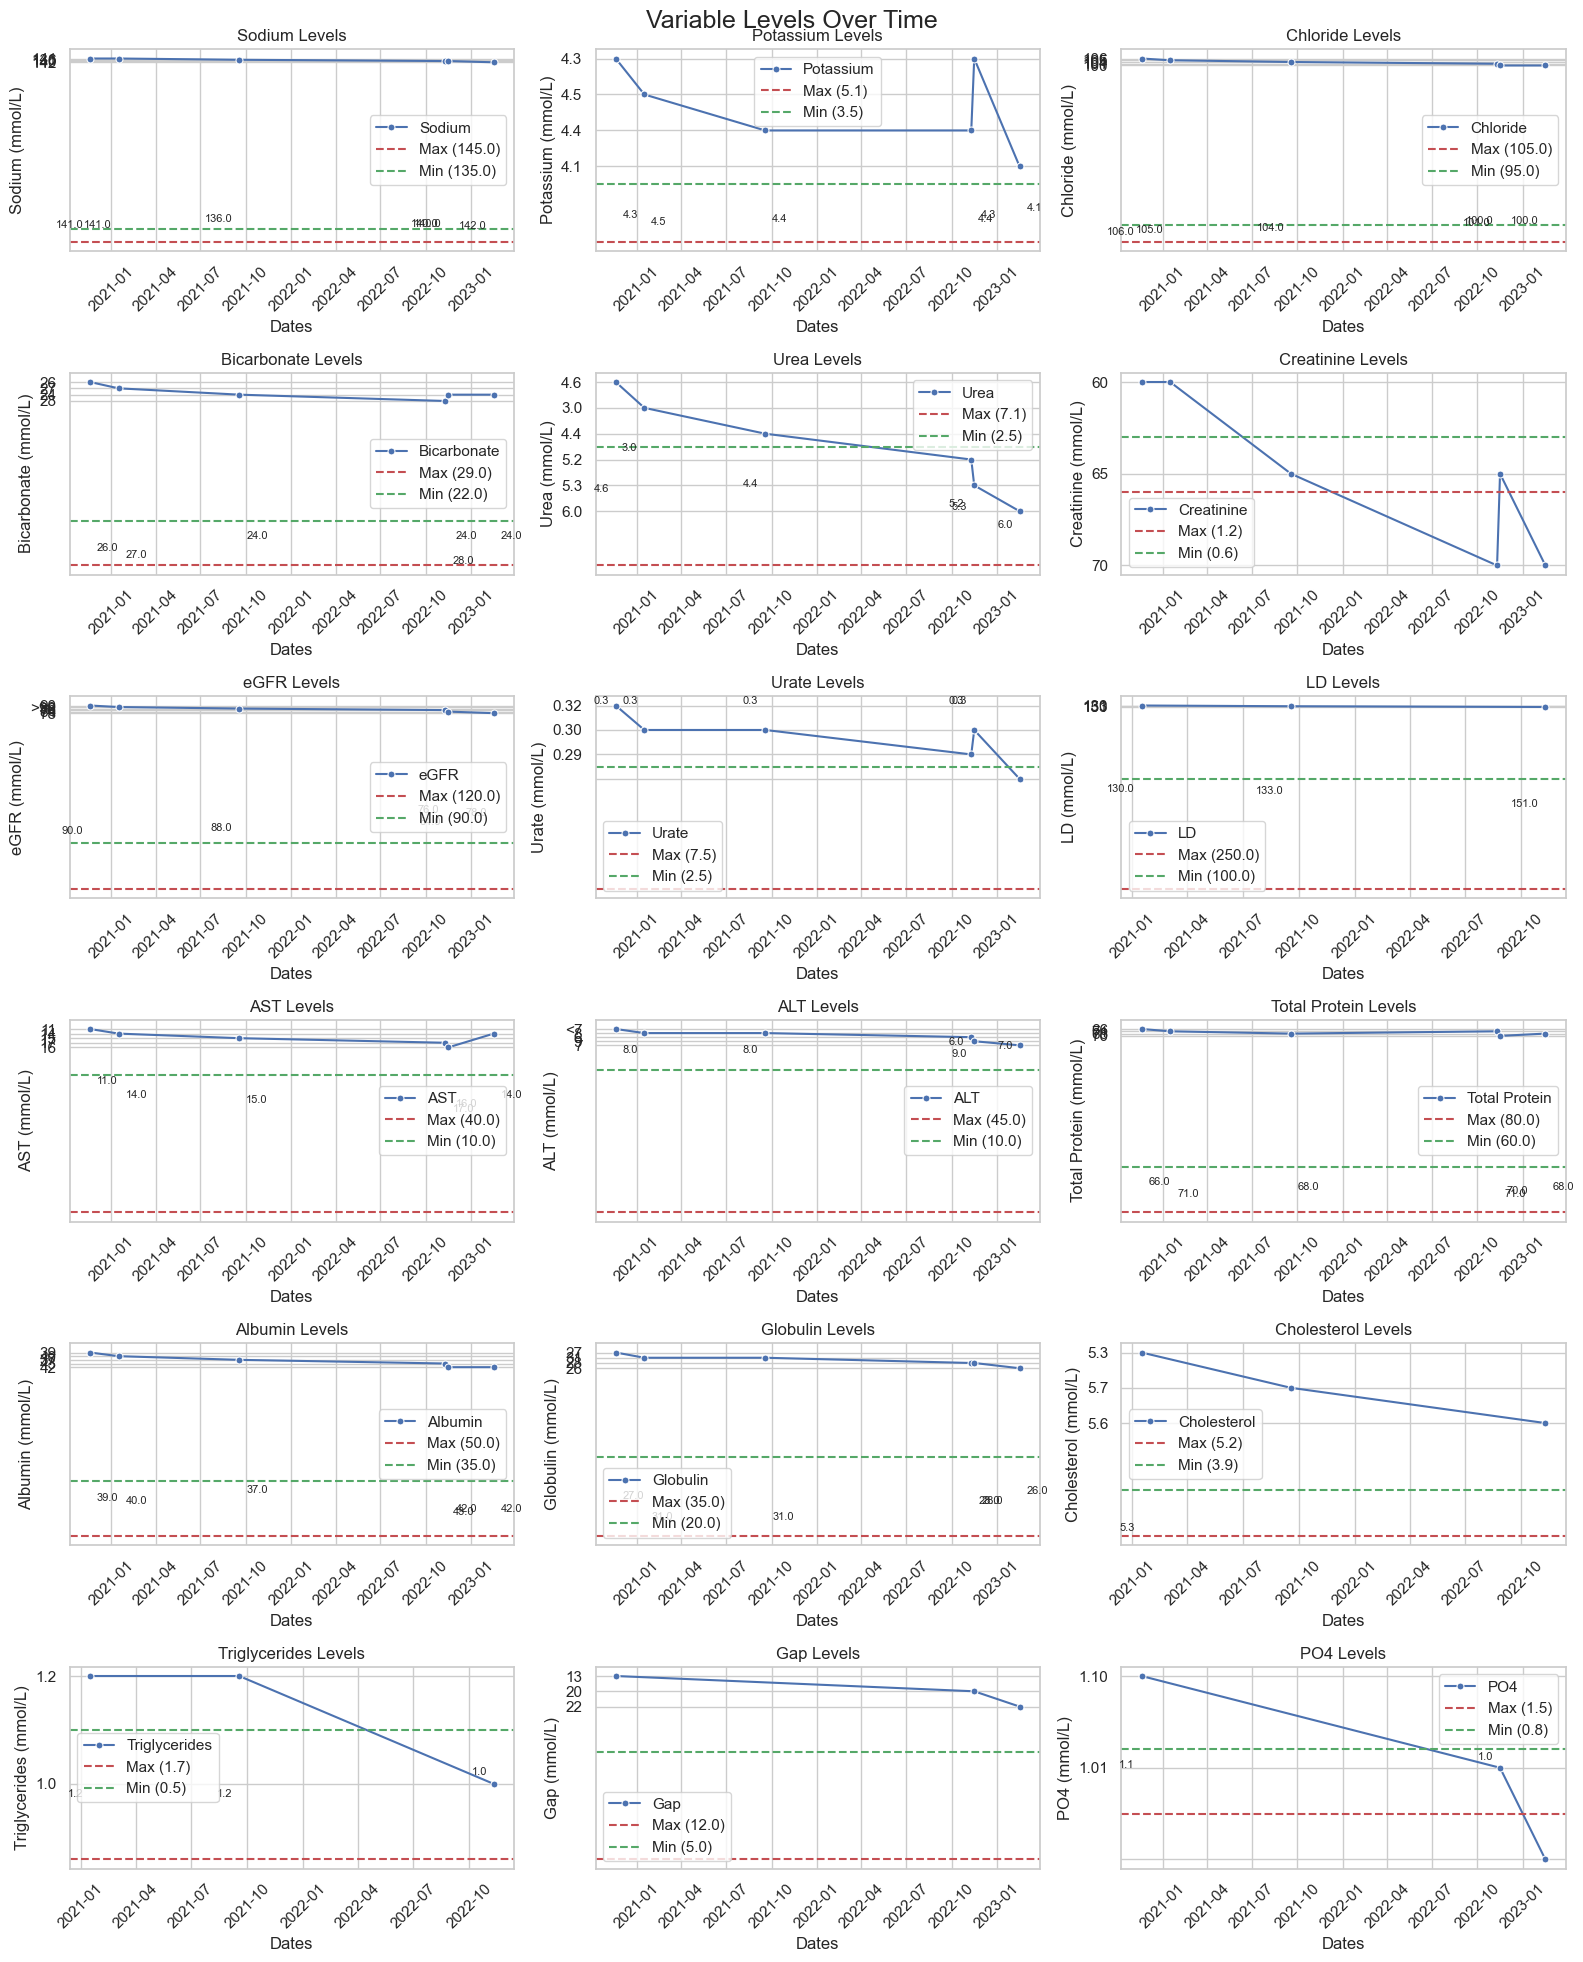

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="whitegrid")

# Convert date strings to datetime format
transposed_df['Dates'] = pd.to_datetime(transposed_df['Dates'],format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Urea', 'Creatinine',
             'eGFR', 'Urate', 'LD', 'AST', 'ALT', 'Total Protein', 'Albumin',
             'Globulin', 'Cholesterol', 'Triglycerides', 'Gap', 'PO4']

# Define thresholds for specific variables (replace these with appropriate values)
thresholds = {'Sodium': (135, 145),
              'Potassium': (3.5, 5.1),
              'Chloride': (95, 105),
              'Bicarbonate': (22, 29),
              'Urea': (2.5, 7.1),
              'Creatinine': (0.6, 1.2),
              'eGFR': (90, 120),
              'Urate': (2.5, 7.5),
              'LD': (100, 250),
              'AST': (10, 40),
              'ALT': (10, 45),
              'Total Protein': (60, 80),
              'Albumin': (35, 50),
              'Globulin': (20, 35),
              'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'Gap': (5, 12),
              'PO4': (0.8, 1.5)}
num_plots = len(variables)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
# Calculate the number of rows and columns for the subplots
#num_plots = len(variables)
#num_rows = int(num_plots ** 0.5)
#num_cols = int(num_plots / num_rows) if num_plots % num_rows == 0 else num_rows + 1

# Create subplots in a grid layout with larger size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
fig.suptitle('Variable Levels Over Time', fontsize=18)

# Plot each variable in a separate subplot using Seaborn's lineplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot line chart using Seaborn's lineplot with markers and labels
    sns.lineplot(data=transposed_df, x='Dates', y=var, ax=ax, marker='o', markersize=5, label=var)

    # Convert the marker values column to numeric type
    transposed_df[var] = pd.to_numeric(transposed_df[var], errors='coerce')

    # Annotate marker values
    for x_val, y_val in zip(transposed_df['Dates'], transposed_df[var]):
        if not pd.isnull(y_val):
            if transposed_df[var].diff().iloc[1] > 0:
                xytext = (5, -5)
                ha = 'left'
            else:
                xytext = (-5, 5)
                ha = 'right'
            ax.annotate(f'{y_val:.1f}', (x_val, y_val), xytext=xytext, textcoords='offset points', ha=ha, va='bottom', fontsize=8)

    ax.set_xlabel('Dates')
    ax.set_ylabel(var + ' (mmol/L)')  # Replace 'mmol/L' with appropriate units
    ax.set_title(var + ' Levels')

    # Specify horizontal line types for thresholds
    if var in thresholds:
        min_val, max_val = thresholds[var]
        ax.axhline(y=max_val, color='r', linestyle='--', label=f'Max ({max_val:.1f})')
        ax.axhline(y=min_val, color='g', linestyle='--', label=f'Min ({min_val:.1f})')
        ax.legend()

    # Configure x-axis tick locations and labels
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    if num_rows > 1:
        axes[-1, -1].axis('off')
    else:
        axes[-1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()


/Users/prathyushavajinepally/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prathyushavajinepally/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prathyushavajinepally/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

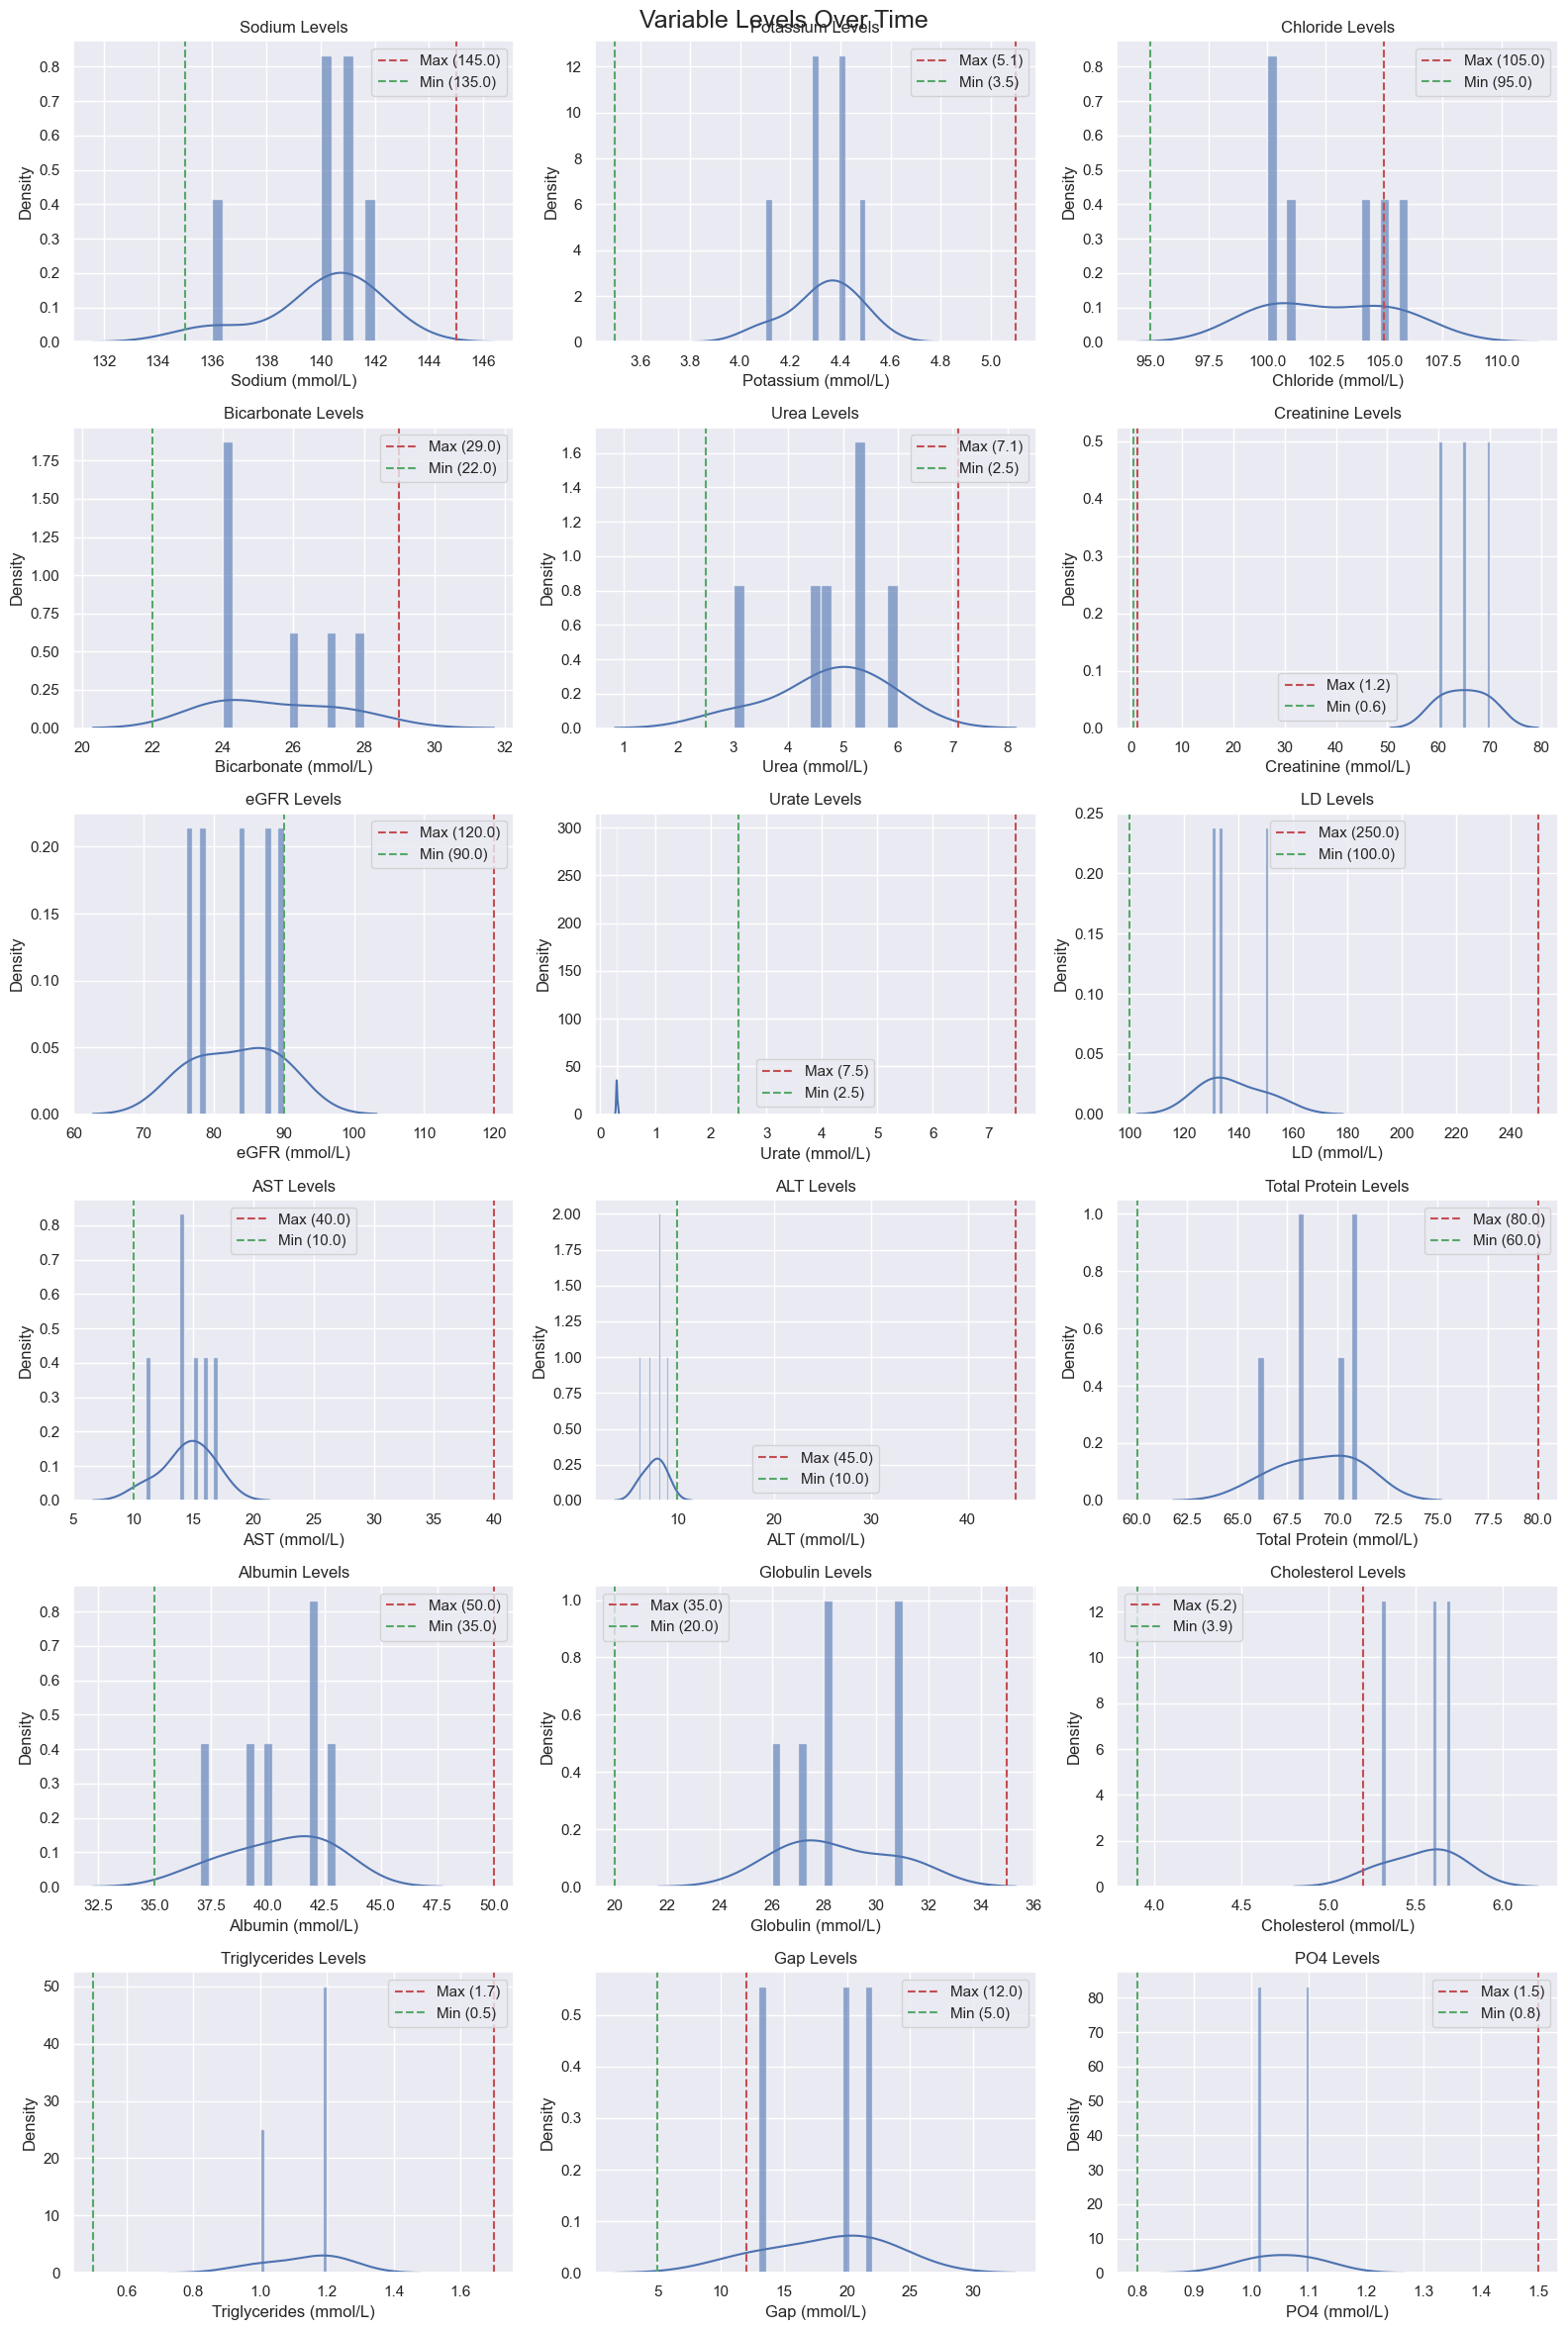

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="darkgrid")

# Convert date strings to datetime format
transposed_df['Dates'] = pd.to_datetime(transposed_df['Dates'], format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Urea', 'Creatinine',
             'eGFR', 'Urate', 'LD', 'AST', 'ALT', 'Total Protein', 'Albumin',
             'Globulin', 'Cholesterol', 'Triglycerides', 'Gap', 'PO4']

# Define thresholds for specific variables (replace these with appropriate values)
thresholds = {'Sodium': (135, 145),
              'Potassium': (3.5, 5.1),
              'Chloride': (95, 105),
              'Bicarbonate': (22, 29),
              'Urea': (2.5, 7.1),
              'Creatinine': (0.6, 1.2),
              'eGFR': (90, 120),
              'Urate': (2.5, 7.5),
              'LD': (100, 250),
              'AST': (10, 40),
              'ALT': (10, 45),
              'Total Protein': (60, 80),
              'Albumin': (35, 50),
              'Globulin': (20, 35),
              'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'Gap': (5, 12),
              'PO4': (0.8, 1.5)}

num_plots = len(variables)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots in a grid layout with larger size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))
fig.suptitle('Variable Levels Over Time', fontsize=18)

# Plot each variable in a separate subplot using Seaborn's distplot
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot histogram and kernel density estimate using Seaborn's distplot
    sns.distplot(transposed_df[var], ax=ax, bins=15, kde=True, hist_kws={'alpha': 0.6})

    # Annotate threshold lines
    if var in thresholds:
        min_val, max_val = thresholds[var]
        ax.axvline(x=max_val, color='r', linestyle='--', label=f'Max ({max_val:.1f})')
        ax.axvline(x=min_val, color='g', linestyle='--', label=f'Min ({min_val:.1f})')
        ax.legend()

    ax.set_xlabel(var + ' (mmol/L)')  # Replace 'mmol/L' with appropriate units
    ax.set_title(var + ' Levels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()


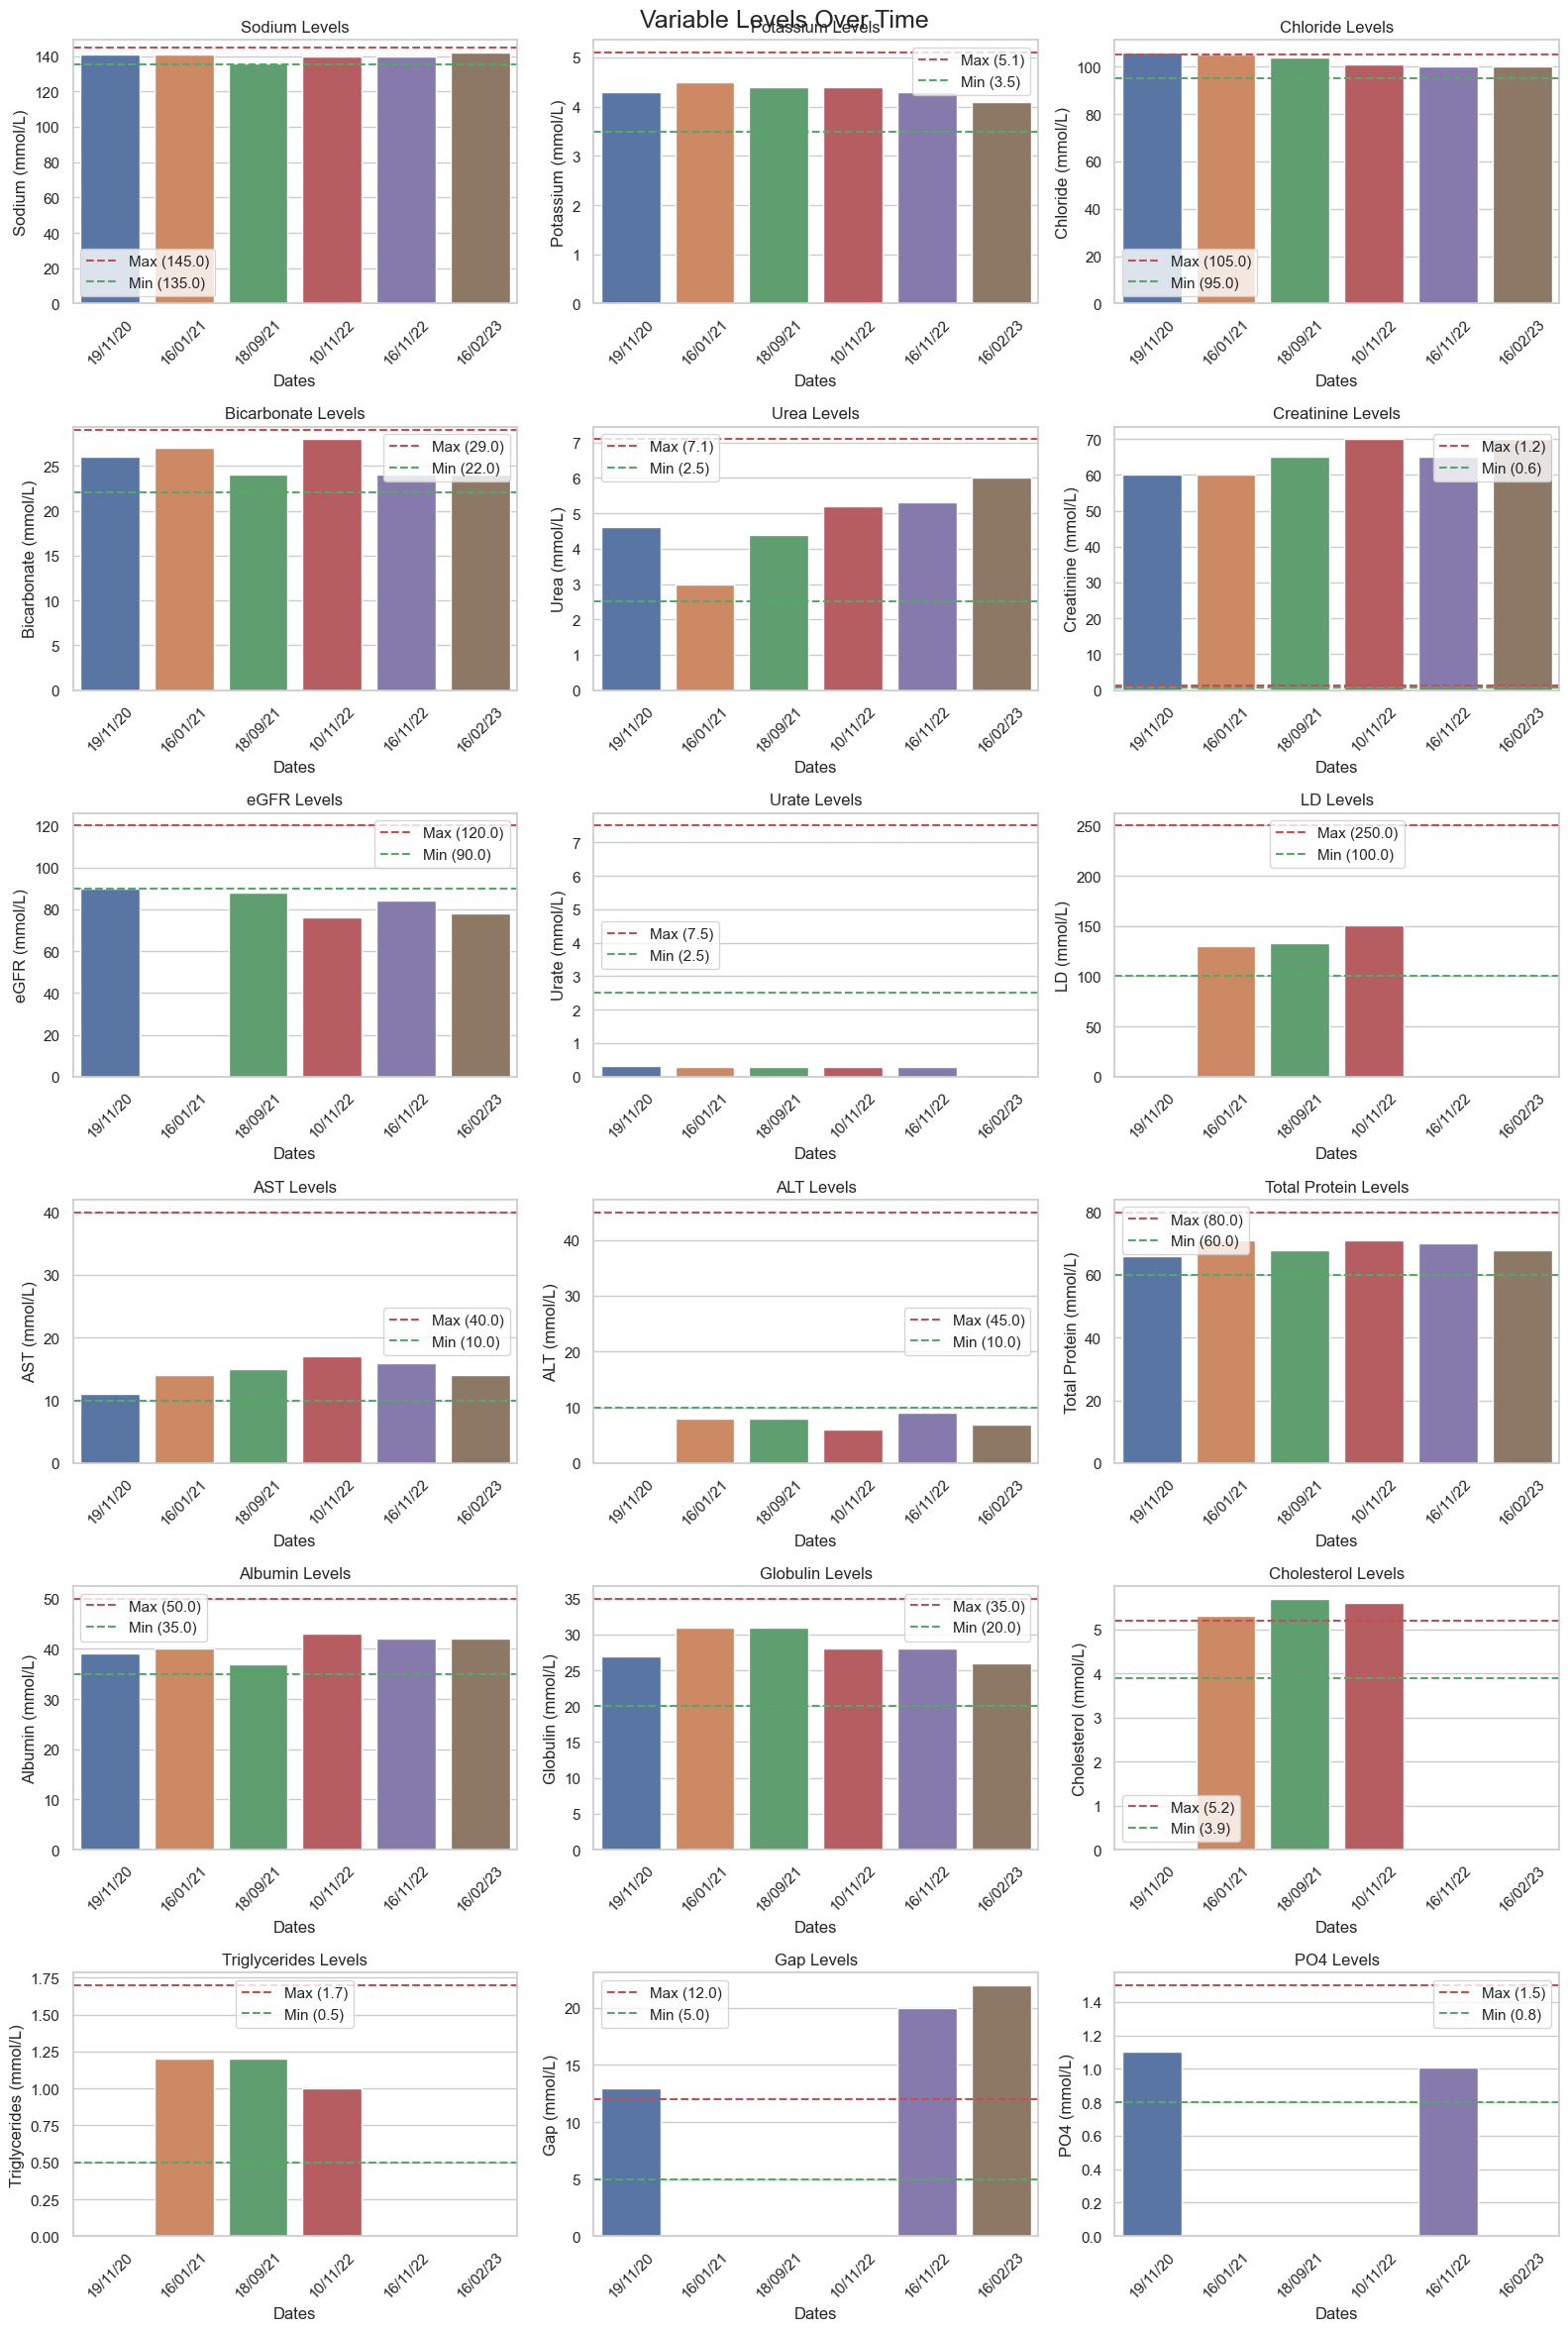

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="whitegrid")

# Convert date strings to datetime format
transposed_df['Dates'] = pd.to_datetime(transposed_df['Dates'], format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Urea', 'Creatinine',
             'eGFR', 'Urate', 'LD', 'AST', 'ALT', 'Total Protein', 'Albumin',
             'Globulin', 'Cholesterol', 'Triglycerides', 'Gap', 'PO4']

# Define thresholds for specific variables (replace these with appropriate values)
thresholds = {'Sodium': (135, 145),
              'Potassium': (3.5, 5.1),
              'Chloride': (95, 105),
              'Bicarbonate': (22, 29),
              'Urea': (2.5, 7.1),
              'Creatinine': (0.6, 1.2),
              'eGFR': (90, 120),
              'Urate': (2.5, 7.5),
              'LD': (100, 250),
              'AST': (10, 40),
              'ALT': (10, 45),
              'Total Protein': (60, 80),
              'Albumin': (35, 50),
              'Globulin': (20, 35),
              'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'Gap': (5, 12),
              'PO4': (0.8, 1.5)}

num_plots = len(variables)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots in a grid layout with larger size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))
fig.suptitle('Variable Levels Over Time', fontsize=18)

# Create bar plot for each variable showing the mean value
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot bar plot using Seaborn's barplot
    sns.barplot(data=transposed_df, x='Dates', y=var, ax=ax)

    # Annotate threshold lines
    if var in thresholds:
        min_val, max_val = thresholds[var]
        ax.axhline(y=max_val, color='r', linestyle='--', label=f'Max ({max_val:.1f})')
        ax.axhline(y=min_val, color='g', linestyle='--', label=f'Min ({min_val:.1f})')
        ax.legend()

    ax.set_xlabel('Dates')
    ax.set_ylabel(var + ' (mmol/L)')  # Replace 'mmol/L' with appropriate units
    ax.set_title(var + ' Levels')
    # Rotate x-axis tick labels by 45 degrees
    ax.set_xticklabels([date.strftime('%d/%m/%y') for date in transposed_df['Dates']], rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()


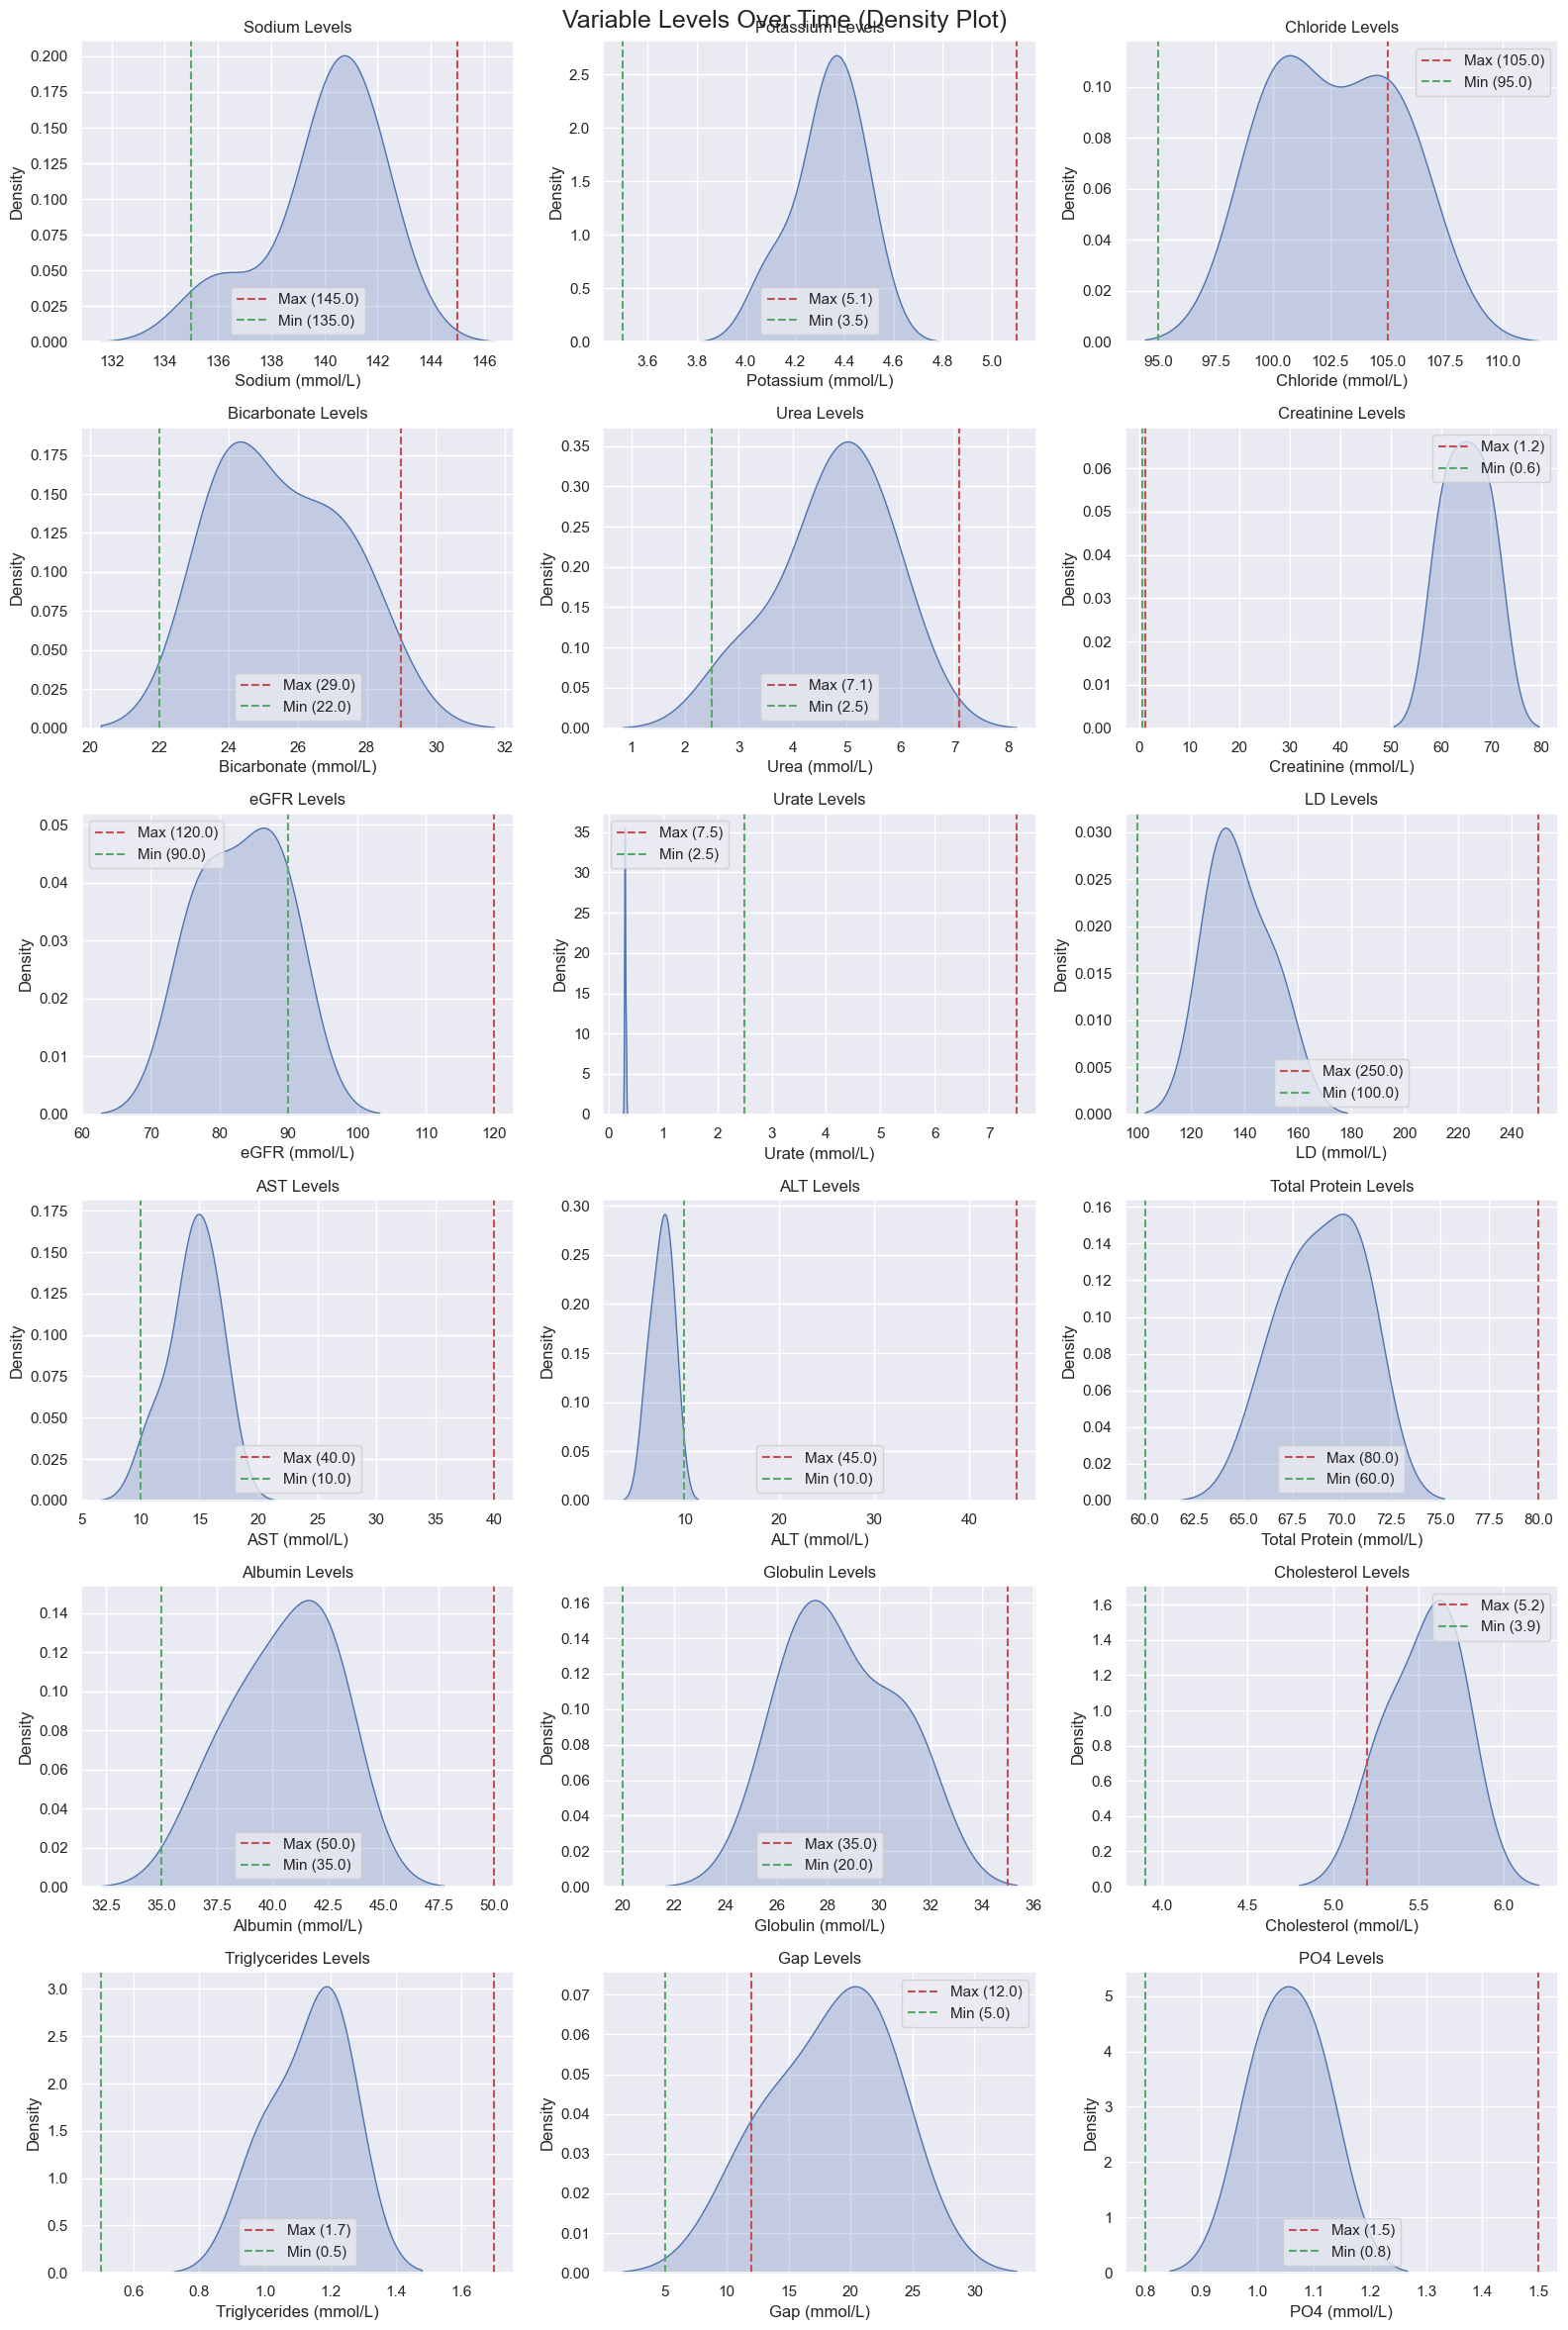

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

sns.set(style="darkgrid")

# Convert date strings to datetime format
transposed_df['Dates'] = pd.to_datetime(transposed_df['Dates'], format='%d/%m/%y')

# Create a list of variables to plot
variables = ['Sodium', 'Potassium', 'Chloride', 'Bicarbonate', 'Urea', 'Creatinine',
             'eGFR', 'Urate', 'LD', 'AST', 'ALT', 'Total Protein', 'Albumin',
             'Globulin', 'Cholesterol', 'Triglycerides', 'Gap', 'PO4']

# Define thresholds for specific variables (replace these with appropriate values)
thresholds = {'Sodium': (135, 145),
              'Potassium': (3.5, 5.1),
              'Chloride': (95, 105),
              'Bicarbonate': (22, 29),
              'Urea': (2.5, 7.1),
              'Creatinine': (0.6, 1.2),
              'eGFR': (90, 120),
              'Urate': (2.5, 7.5),
              'LD': (100, 250),
              'AST': (10, 40),
              'ALT': (10, 45),
              'Total Protein': (60, 80),
              'Albumin': (35, 50),
              'Globulin': (20, 35),
              'Cholesterol': (3.9, 5.2),
              'Triglycerides': (0.5, 1.7),
              'Gap': (5, 12),
              'PO4': (0.8, 1.5)}

num_plots = len(variables)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots in a grid layout with larger size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))
fig.suptitle('Variable Levels Over Time (Density Plot)', fontsize=18)

# Create density plot for each variable
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plot density plot using Seaborn's kdeplot
    sns.kdeplot(data=transposed_df, x=var, ax=ax, fill=True, common_norm=False)

    # Annotate threshold lines
    if var in thresholds:
        min_val, max_val = thresholds[var]
        ax.axvline(x=max_val, color='r', linestyle='--', label=f'Max ({max_val:.1f})')
        ax.axvline(x=min_val, color='g', linestyle='--', label=f'Min ({min_val:.1f})')
        ax.legend()

    ax.set_xlabel(var + ' (mmol/L)')  # Replace 'mmol/L' with appropriate units
    ax.set_title(var + ' Levels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()
